# AirBnBs in New York

Although I do not own any property in New York, I have plans of running an AirBnB in the area with the hopes of getting a large secondary income because of its pricey property market. Entering a new market requires careful inspection of its dynamics; using Kaggle's dataset on AirBnB's in New York, I hope to gain insights that would help me determine how to run an AirBnB in New York.

In [2]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import random
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import cufflinks

In [4]:
#Importing the dataset
bnb=pd.read_csv("/Users/isuruabeysekara/Downloads/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [8]:
#Exploring the dataset
bnb.info()
bnb.head()
bnb.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

# Basic Analysis

In [11]:
#Where are AirBnBs listed the most?
count=bnb.groupby('neighbourhood').size().sort_values(ascending= False)
print(count)

neighbourhood
Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgew

Most AirBnBs are listed in Williamsburg, whereas the least AirBnBs are listed in Woodrow, New Dorp, Willowbrook, Fort Wadsworth, Richmondtown and Rosville. The count dataframe may indicate market saturation in Williamsburg and opportunities in places like Rossville; whilst there is no additional information to support this theory, it could be one potential hypothesis.

In [12]:
roomc=bnb.groupby(['room_type']).size().sort_values(ascending= False)
print(roomc)

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64


Shared rooms are not listed as much as the other two types. Such a signficant disparity in preference will prompt me to list shared rooms less than the other two types.

In [20]:
bnb1=bnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'room_type']].groupby('room_type').agg('mean')
bnb1['avg_rev_per_listing']=bnb1['price']*bnb1['minimum_nights']
print(bnb1)

                      price  minimum_nights  number_of_reviews  \
room_type                                                        
Entire home/apt  211.794246        8.506907          22.842418   
Private room      89.780973        5.377900          24.112962   
Shared room       70.127586        6.475000          16.600000   

                 reviews_per_month  availability_365  avg_rev_per_listing  
room_type                                                                  
Entire home/apt           1.306578        111.920304          1801.713955  
Private room              1.445209        111.203933           482.833112  
Shared room               1.471726        162.000862           454.076121  


The bnb1 dataframe shows that it is sensible for me to list an entire home or apartment because the average listing is at a significantly higher price and for the longest time period, meaning that the average revenue per listing is signficantly higher than other room types.

The dataframe will also deter me from listing shared rooms, because it takes yields the lowest average revenue per listing and takes the longest to be occupied by customers.

In [21]:
price=bnb.groupby(['neighbourhood']).agg('mean').loc[:,'price'].sort_values(ascending= False)
print(price)

neighbourhood
Fort Wadsworth        800.000000
Woodrow               700.000000
Tribeca               490.638418
Sea Gate              487.857143
Riverdale             442.090909
Prince's Bay          409.500000
Battery Park City     367.557143
Flatiron District     341.925000
Randall Manor         336.000000
NoHo                  295.717949
SoHo                  287.103352
Midtown               282.719094
Neponsit              274.666667
West Village          267.682292
Greenwich Village     263.405612
Chelsea               249.738544
Willowbrook           249.000000
Theater District      248.013889
Nolita                230.138340
Financial District    225.490591
Gramercy              222.754438
Little Italy          222.066116
Murray Hill           220.958763
Breezy Point          213.333333
Cobble Hill           211.929293
Upper West Side       210.918316
Brooklyn Heights      209.064935
Hell's Kitchen        204.794178
Kips Bay              202.408511
DUMBO                 196.305

The prices of Fort Wadsworth and Woodrow seem to be the highest; it is also listed the least. Any successful listing here would yield a large income!

In [22]:
#Checking how long a listing takes to get occupied
bins = pd.IntervalIndex.from_tuples([(0, 50), (51, 100), (101, 150), (151,200), (201, 250), (251, 300), (301, 365)])
bnb['new_avail']=pd.cut(bnb['availability_365'], bins)
bnb.groupby('new_avail').size().sort_values(ascending= True)

new_avail
(101, 150]    2266
(201, 250]    2301
(251, 300]    2822
(151, 200]    3421
(51, 100]     4757
(0, 50]       7395
(301, 365]    8045
dtype: int64

Most listings take between 0-50 and 301-365 days to get occupied.

# Checking the price variable's relationship with other variables in the dataset

Now that I have a basic understanding of how AirBnBs operate in New York, I need to see how I can price my property in a way that I can maximize my income.

0.08182882742168804


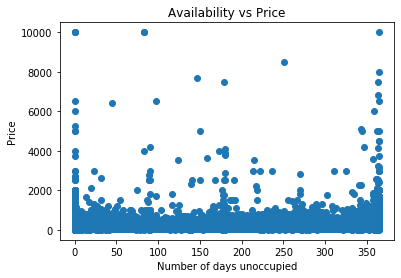

In [34]:
#Does the number of days that a property is unoccupied affect price?
print(bnb['availability_365'].corr(bnb['price']))
plt.scatter(x=bnb['availability_365'], y=bnb['price'])
plt.title('Availability vs Price')
plt.xlabel('Number of days unoccupied')
plt.ylabel('Price')
plt.show()

There is close to no correlation between the number of days unoccupied and price. Therefore, in the event that my property is unoccupied for a long period of time, I do not necessarily have to lower the price.

-0.04795422658266219


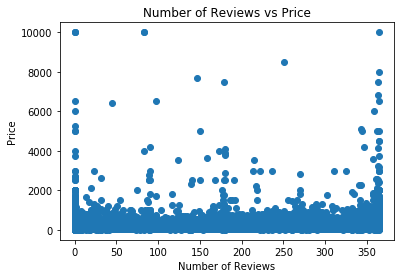

In [35]:
#Does the number of reviews affect price?
print(bnb['number_of_reviews'].corr(bnb['price']))
plt.scatter(x=bnb['availability_365'], y=bnb['price'])
plt.title('Number of Reviews vs Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

There is close to no correlation between the number of days unoccupied and price. This means that I cannot use credibility based on the number of reviews to justify adding value and premiums to the base price.

In [30]:
#Does room type affect price?
bnb['price'].corr((bnb['room_type']=='Private room'))

-0.053612815232286

In [31]:
bnb['price'].corr((bnb['room_type']=='Entire home/apt'))

0.25585664692550714

In [32]:
bnb['price'].corr((bnb['room_type']=='Shared room'))

-0.053612815232286

There is a slightly positive correlation between price and listing entire homes or apartments but little to no correlation for other room types.

In [36]:
#How should I phrase my adverts?: extracting the most used words from the name column and checking which words correspond with high priced listings and which words correspond with low priced listings
bnb['name']=bnb['name'].str.lower()
##Defining function to extract words including stop words:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

##Defining function to extract words excluding stop words:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
##Function does not work with NA values
bnb['new_name']=bnb['name'].fillna("not available")
bnb['new_name']=bnb['new_name'].str.lower()

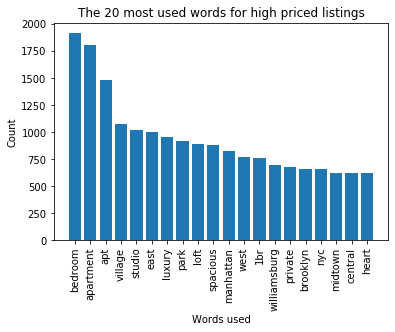

In [47]:
##Splitting the price variable into 4 quartiles
bnb['qrt']=pd.qcut(bnb['price'], 4, labels=["1", "2", "3", "4"])
##Extracting words from the highest priced listings
x=bnb[bnb['qrt'] =="4"]
common_words = get_top_n_words(x['new_name'], 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
df1.groupby('desc').sum()['count'].sort_values(ascending= False)
plt.bar(x=df1['desc'], height=df1['count'])
plt.xticks(rotation=90)
plt.title("The 20 most used words for high priced listings")
plt.xlabel("Words used")
plt.ylabel("Count")
plt.show()

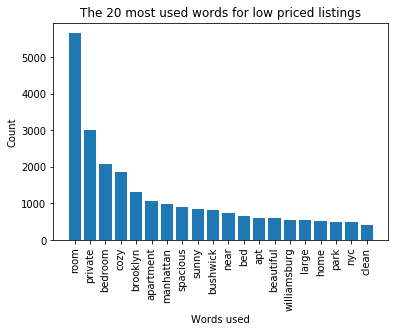

In [48]:
#Extracting words from the lowest priced listings
y=bnb[bnb['qrt'] =="1"]
common_words1 = get_top_n_words(y['new_name'], 20)
df2 = pd.DataFrame(common_words1, columns = ['desc' , 'count'])
df2.groupby('desc').sum()['count'].sort_values(ascending= False)
plt.bar(x=df2['desc'], height=df2['count'])
plt.xticks(rotation=90)
plt.title("The 20 most used words for low priced listings")
plt.xlabel("Words used")
plt.ylabel("Count")
plt.show()

I can now change my marketing according to my pricing strategy; if I want to charge high prices, I can use words like "luxury", but if I want to charge low prices, I can use words like "large".

0.016810601705100254


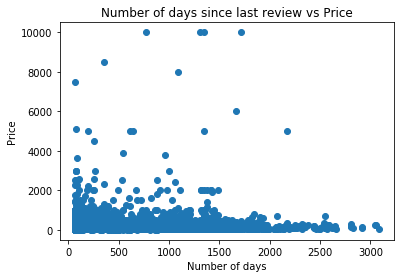

In [49]:
#Does the number of days since last review affect price?
bnb['last_r_d']=pd.datetime.now()-pd.to_datetime(bnb['last_review'], format="%Y-%m-%d")
bnb['last_r_d']=bnb['last_r_d'].dt.days
print(bnb['price'].corr(bnb['last_r_d']))
plt.scatter(x=bnb['last_r_d'], y=bnb['price'])
plt.title('Number of days since last review vs Price')
plt.xlabel('Number of days')
plt.ylabel('Price')
plt.show()

Once again, there is little correlation between the number of days since last review and price. This means that I do not have to worry about up to date reviews when I make my pricing decisions.

# Summary

1) Places like Williamsburg have been advertised the most, and places like Rossville the least.
2) Renting entire apartments seems to be a favorable choice, mainly because it yields more revenue on average.
3) Number of days since last review, number of days unoccupied and room type(except for entire aparments) do not play a significant role in determining price.
4) The analysis shows what words to use for adverts based on pricing strategy.